# Simple Linear Regression Test

In [430]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [416]:
# importing helper functions
%run helper_functions.ipynb 

In [417]:
# importing dataframes
data_df = pd.read_csv("../data/data_2016-2021_hourly.csv", sep=";")

In [418]:
# replacing every , with . in the data
data_df = data_df.apply(lambda col: col.astype(str).str.replace(",","."))
data_df = data_df.astype("float32")

In [439]:
X_data = data_df.drop(columns=["Year", "Month","Day", "Weekday", "Hour"], axis=1)
X = series_to_supervised(X_data, n_in=6,n_out=0, dropnan=False)

In [443]:
X_data.columns
    

Index(['PRODUCTION (MWh)', 'CONSUMP (MWh)', 'PRICE (EUR/MWh)',
       'MAARIANHAMINA CLOUDS (1/8)', 'MAARIANHAMINA TEMP (C)',
       'MAARIANHAMINA WIND (m/s)', 'JYVÄSKYLÄ CLOUDS (1/8)',
       'JYVÄSKYLÄ TEMP (C)', 'JYVÄSKYLÄ WIND (m/s)', 'KAJAANI CLOUDS (1/8)',
       'KAJAANI TEMP (C)', 'KAJAANI WIND (m/s)', 'KUUSAMO CLOUDS (1/8)',
       'KUUSAMO TEMP (C)', 'KUUSAMO WIND (m/s)', 'JOENSUU CLOUDS (1/8)',
       'JOENSUU TEMP (C)', 'JOENSUU WIND (m/s)', 'OULU CLOUDS (1/8)',
       'OULU TEMP (C)', 'OULU WIND (m/s)', 'PORI CLOUDS (1/8)',
       'PORI TEMP (C)', 'PORI WIND (m/s)', 'KUOPIO CLOUDS (1/8)',
       'KUOPIO TEMP (C)', 'KUOPIO WIND (m/s)', 'SODANKYLÄ CLOUDS (1/8)',
       'SODANKYLÄ TEMP (C)', 'SODANKYLÄ WIND (m/s)', 'TURKU CLOUDS (1/8)',
       'TURKU TEMP (C)', 'TURKU WIND (m/s)'],
      dtype='object')

In [421]:
# selecting only rows wihtout nan
valid_rows = ~((X.isna().any(axis=1)) | (y.isna()))
X = X[valid_rows]
y = y[valid_rows]

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Random forest regressor

In [424]:
# create model and train it
regr_random_forest = RandomForestRegressor()
regr_random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [397]:
regr_random_forest.score(X_test, y_test)

0.8865940932257202

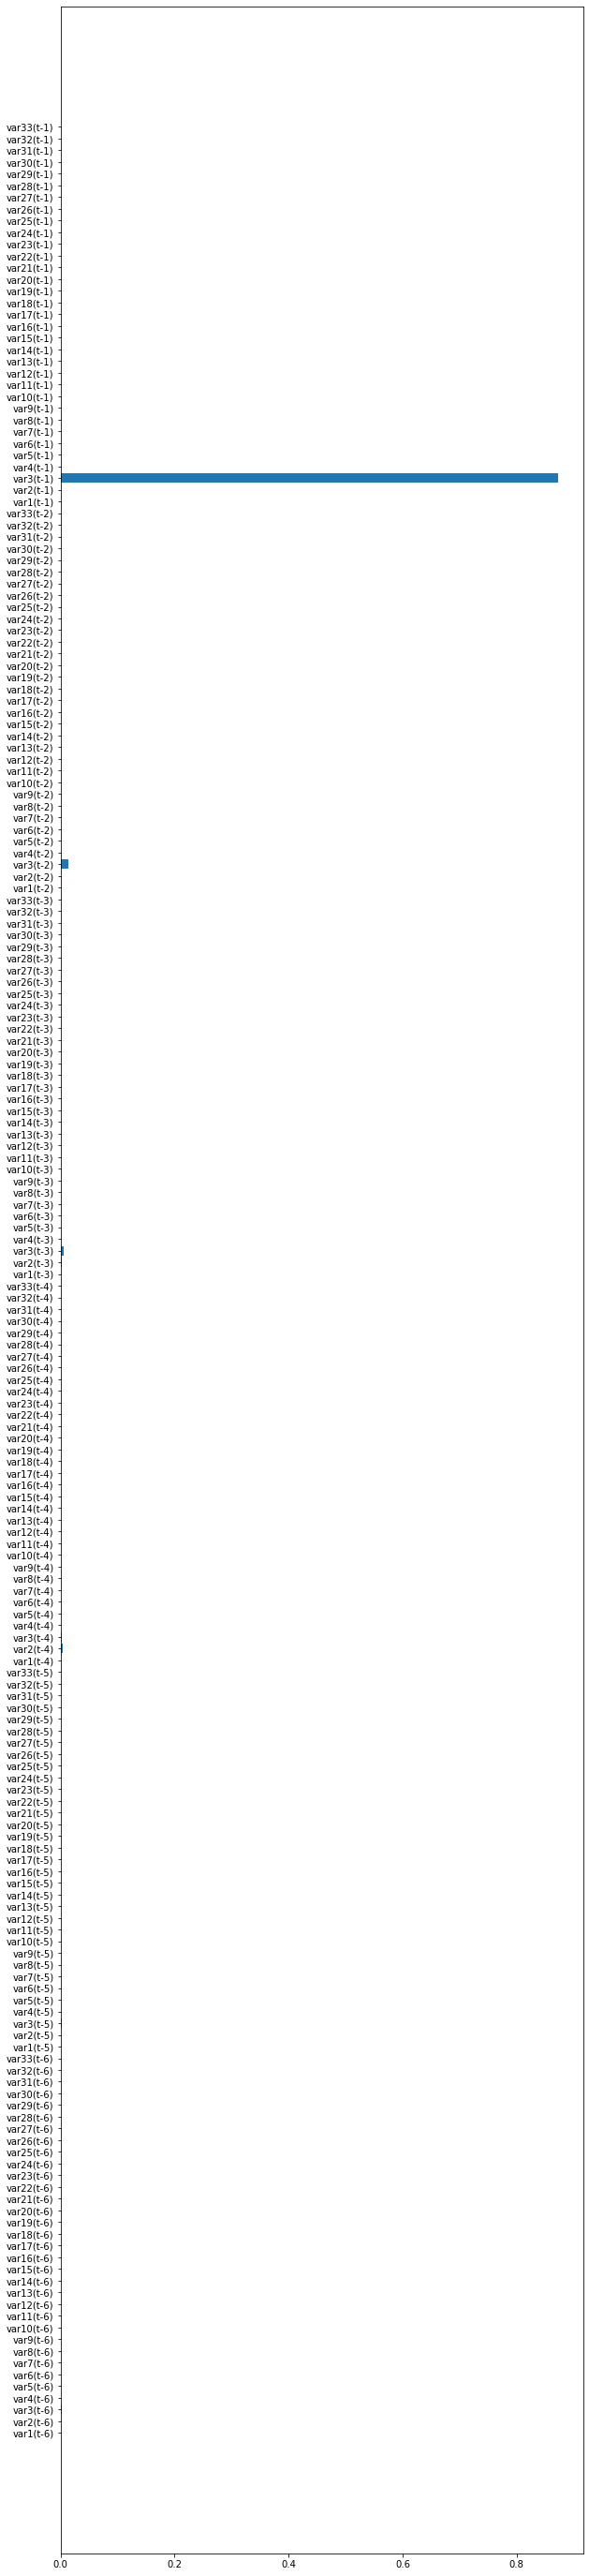

In [444]:
feature_importances = regr.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,50))
plt.barh(feature_names, feature_importances)
plt.savefig("feature_importance")

## Linear regressor

In [426]:
# create model and train it
regr_linear = LinearRegression()
regr_linear.fit(X_train, y_train)

LinearRegression()

In [427]:
regr_linear.score(X_test, y_test)

0.8803986628213202